In [3]:
!pip install transformers>=4.41.0,<5.0.0 --upgrade

/bin/bash: line 1: 5.0.0: No such file or directory


In [ ]:
!pip install protobuf

In [ ]:
!git clone https://github.com/jordantab/llm-robustness-experiment.git


Cloning into 'llm-robustness-experiment'...
remote: Enumerating objects: 540, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 540 (delta 115), reused 201 (delta 56), pack-reused 268 (from 1)
Receiving objects: 100% (540/540), 4.24 MiB | 9.53 MiB/s, done.
Resolving deltas: 100% (246/246), done.


In [4]:
import pandas as pd
import seaborn as sns
!pip install wordcloud

Loading Dataset

In [5]:
data = pd.read_csv('/content/flipkart.csv')
data.head()


,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


Selects the column

In [6]:
# unique ratings
pd.unique(data['Rating'])


array([5, 4, 3, 2, 1])

Bar Chat

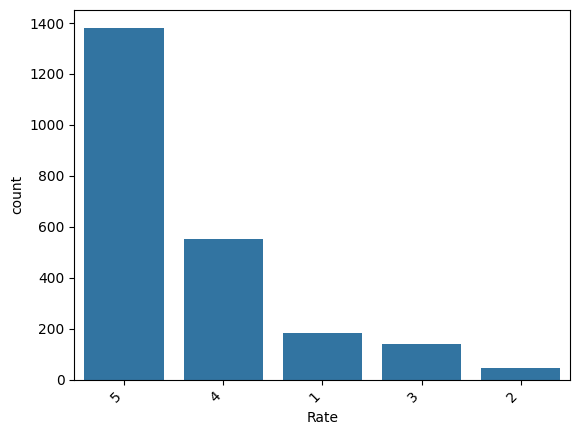

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing values in 'Rate' column if any
data['Rate'] = data['Rating'].fillna('Missing')

# Create the countplot
sns.countplot(data=data, x='Rate', order=data['Rate'].value_counts().index)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

cleaning and preprocessing

In [8]:
import nltk
nltk.download('punkt_tab')

import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# Load the data here if it's not already loaded
data = pd.read_csv('/content/flipkart.csv')

def clean_text(text):
  if isinstance(text, str):  # Check if text is a string
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum() and token not in stopwords.words('english')]
    return ' '.join(tokens)
  else:
    return ""  # Or handle non-string values as needed

data['Review'] = data['Review'].apply(clean_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


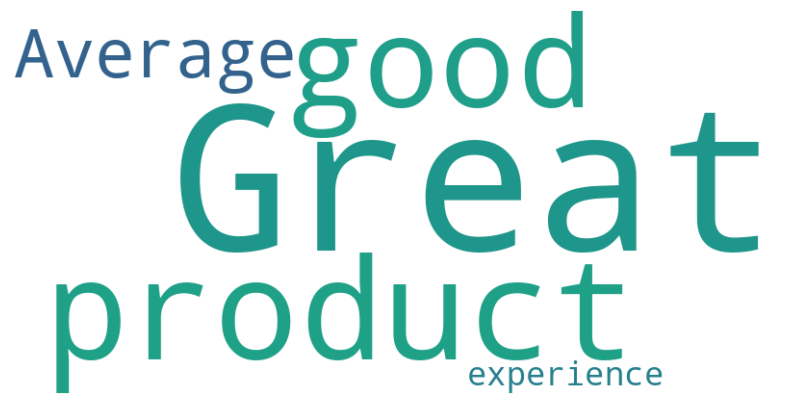

In [9]:
import pandas as pd

# Example: Creating a sample DataFrame
data = pd.DataFrame({'Review': ['Great product!', 'Not so good', 'Average experience']})

# Convert reviews to a single string
all_words = ' '.join(data['Review'].astype(str)) # Join all cleaned reviews into a single string

# Now, generate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


converting text data (likely reviews) into numerical representations using TF-IDF (Term Frequency-Inverse Document Frequency).

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
data = pd.read_csv('/content/flipkart.csv')

# Handle missing values in 'Review' column
data['Review'] = data['Review'].fillna('')  # Replace NaN with empty strings

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Review'])

 training a Logistic Regression model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, data['Rating'], test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
# Evaluate the model's performance
# Make predictions on the test set
y_pred = model.predict(X_test)


evaluating the performance of your trained Logistic Regression model using metrics like accuracy and a classification report.

In [12]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7223427331887202
              precision    recall  f1-score   support

           1       0.82      0.50      0.62        36
           2       0.00      0.00      0.00        12
           3       1.00      0.33      0.50        27
           4       0.70      0.35      0.47       111
           5       0.71      0.97      0.82       275

    accuracy                           0.72       461
   macro avg       0.65      0.43      0.48       461
weighted avg       0.72      0.72      0.68       461



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GridSearchCV to find the best hyperparameters for your Logistic Regression model

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [14]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
def predict_sentiment(text):
    """Predicts the sentiment of a given text."""
    # Preprocess the text using the same steps as during training
    cleaned_text = clean_text(text)
    # Transform the text into a vector using the trained TF-IDF vectorizer
    text_vector = vectorizer.transform([cleaned_text])
    # Make the prediction using your trained model
    prediction = model.predict(text_vector)[0]
    return prediction

In [28]:
from textblob import TextBlob

def predict_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

# List of reviews
reviews = [
    "I absolutely love this product! It's perfect.",
    "Not worth the money. Very disappointing.",
    "It's okay, nothing special.",
    "Fantastic quality and excellent performance!",
    "Not bad."
]

# Analyze each review
for review in reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}")
    print("---")


Review: I absolutely love this product! It's perfect.
Sentiment: Positive
---
Review: Not worth the money. Very disappointing.
Sentiment: Negative
---
Review: It's okay, nothing special.
Sentiment: Positive
---
Review: Fantastic quality and excellent performance!
Sentiment: Positive
---
Review: Not bad.
Sentiment: Positive
---


In [27]:
user_input = input("Enter a text to analyze: ")
predicted_sentiment = predict_sentiment(user_input)
print(f"Predicted Sentiment: {predicted_sentiment}")

Enter a text to analyze: not bad
Predicted Sentiment: Positive


In [20]:
import re

def clean_text(text):
  if isinstance(text, str):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase the text
    text = text.lower()
    return text
  else:
    return ""

In [21]:
import unittest
import re  # Import the 're' module for regular expressions

def clean_text(text):
  if isinstance(text, str):  # Check if text is a string
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase the text
    text = text.lower()
    return text  # Return the cleaned text
  else:
    return ""  # Handle non-string values

class TestCleanText(unittest.TestCase):
    def test_remove_punctuation(self):
        self.assertEqual(clean_text("Hello, world!"), "hello world")

    def test_lowercase(self):
        self.assertEqual(clean_text("UPPERCASE"), "uppercase")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


In [23]:
def test_prediction():
    # Code inside the function should be indented
    print("Inside the function")

# Code outside the function should be at the outer indentation level
print("Outside the function")

# Define your_string_variable before using it
your_string_variable = "This is a sample string"

print(repr(your_string_variable))


Outside the function
'This is a sample string'


In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
print(f"Public URL: {public_url}")
import streamlit as st

st.title("My Streamlit Website")

st.write("Hello, this is a basic website created using Streamlit!")

# Add more elements like text, images, charts, etc.
st.header("A Header")
st.subheader("A Subheader")
st.text("Some text.")
st.markdown("**This is bold text.**")

# Input widgets
name = st.text_input("Enter your name:")
if name:
    st.write(f"Hello, {name}!")

# Button
if st.button("Click me"):
    st.balloons()